# classify the Size_Categorie using SVM

1. month	month of the year: 'jan' to 'dec'
2. day	day of the week: 'mon' to 'sun'
3. FFMC	FFMC index from the FWI system: 18.7 to 96.20
4. DMC	DMC index from the FWI system: 1.1 to 291.3
5. DC	DC index from the FWI system: 7.9 to 860.6
6. ISI	ISI index from the FWI system: 0.0 to 56.10
7. temp	temperature in Celsius degrees: 2.2 to 33.30
8. RH	relative humidity in %: 15.0 to 100
9. wind	wind speed in km/h: 0.40 to 9.40
10. rain	outside rain in mm/m2 : 0.0 to 6.4
11. Size_Categorie 	the burned area of the forest ( Small , Large)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# load the data set
df=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 14- SVM/forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
df.shape

(517, 31)

In [17]:
duplicated row are found in dataset. we can drop this row
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [28]:
df1=df.drop_duplicates(ignore_index=True)

In [29]:
df1[df1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [30]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

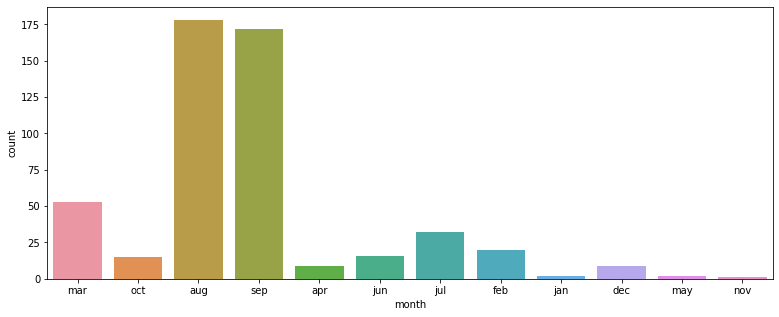

In [49]:
plt.rcParams['figure.figsize']=[13,5]
sns.countplot('month',data=df1)

1. majority time fire occure in month of aug and sep

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

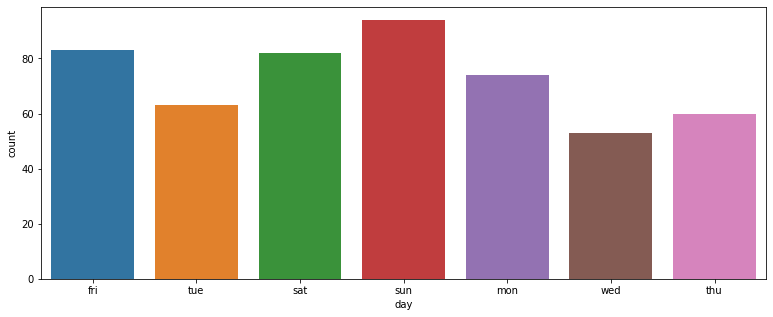

In [50]:
sns.countplot('day',data=df1)

 1. frequency of fire is more on sunday, friday and saturday respe.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

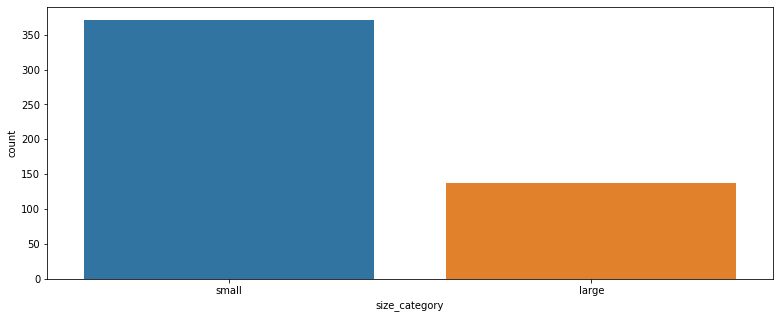

In [51]:
sns.countplot('size_category',data=df1)

(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 429.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <BarContainer object of 10 artists>)

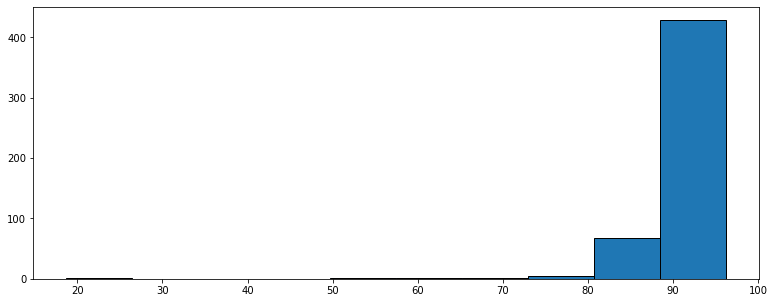

In [56]:

plt.hist(df1['FFMC'],edgecolor='black')


1. FFMC having negative skewness

(array([ 63.,  62.,  49., 112., 112.,  41.,  24.,  22.,   8.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <BarContainer object of 10 artists>)

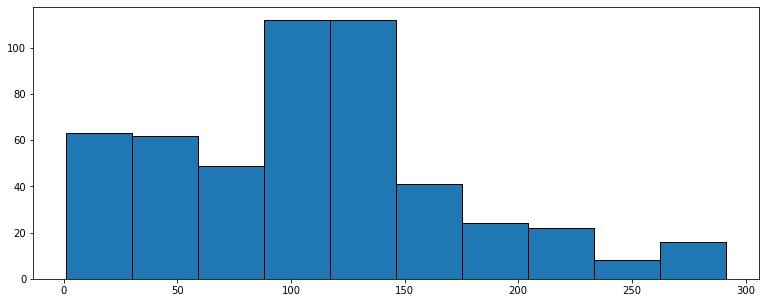

In [58]:
plt.hist(df1['DMC'],edgecolor='black')

(array([ 66.,  21.,   5.,  10.,  25.,  22.,  39., 134., 148.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <BarContainer object of 10 artists>)

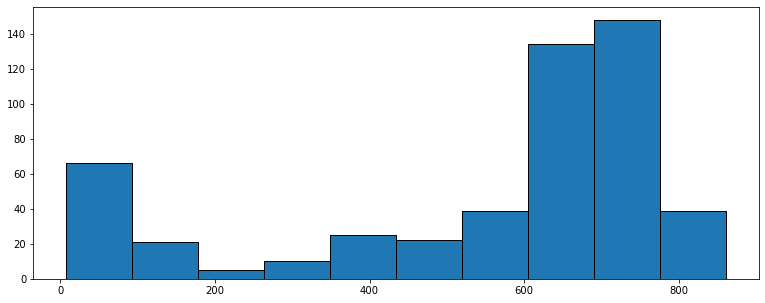

In [70]:
#plt.subplot(2,2,2)
plt.hist(df1['DC'],edgecolor='black')

(array([ 83., 305.,  92.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <BarContainer object of 10 artists>)

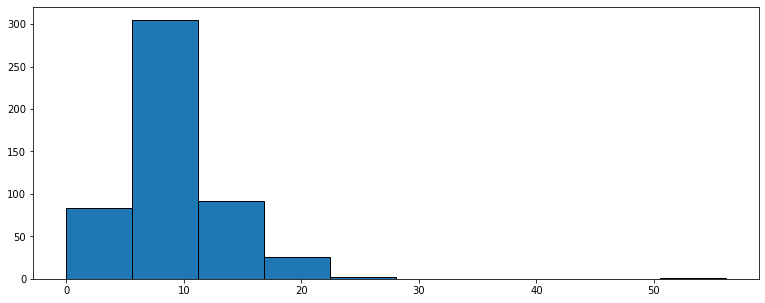

In [71]:
plt.hist(df1['ISI'],edgecolor='black')

1.ISI have positive skewness 

In [73]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

FFMC       AxesSubplot(0.125,0.657941;0.227941x0.222059)
DMC     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
DC      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
ISI        AxesSubplot(0.125,0.391471;0.227941x0.222059)
temp    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
RH      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
wind          AxesSubplot(0.125,0.125;0.227941x0.222059)
rain       AxesSubplot(0.398529,0.125;0.227941x0.222059)
area       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

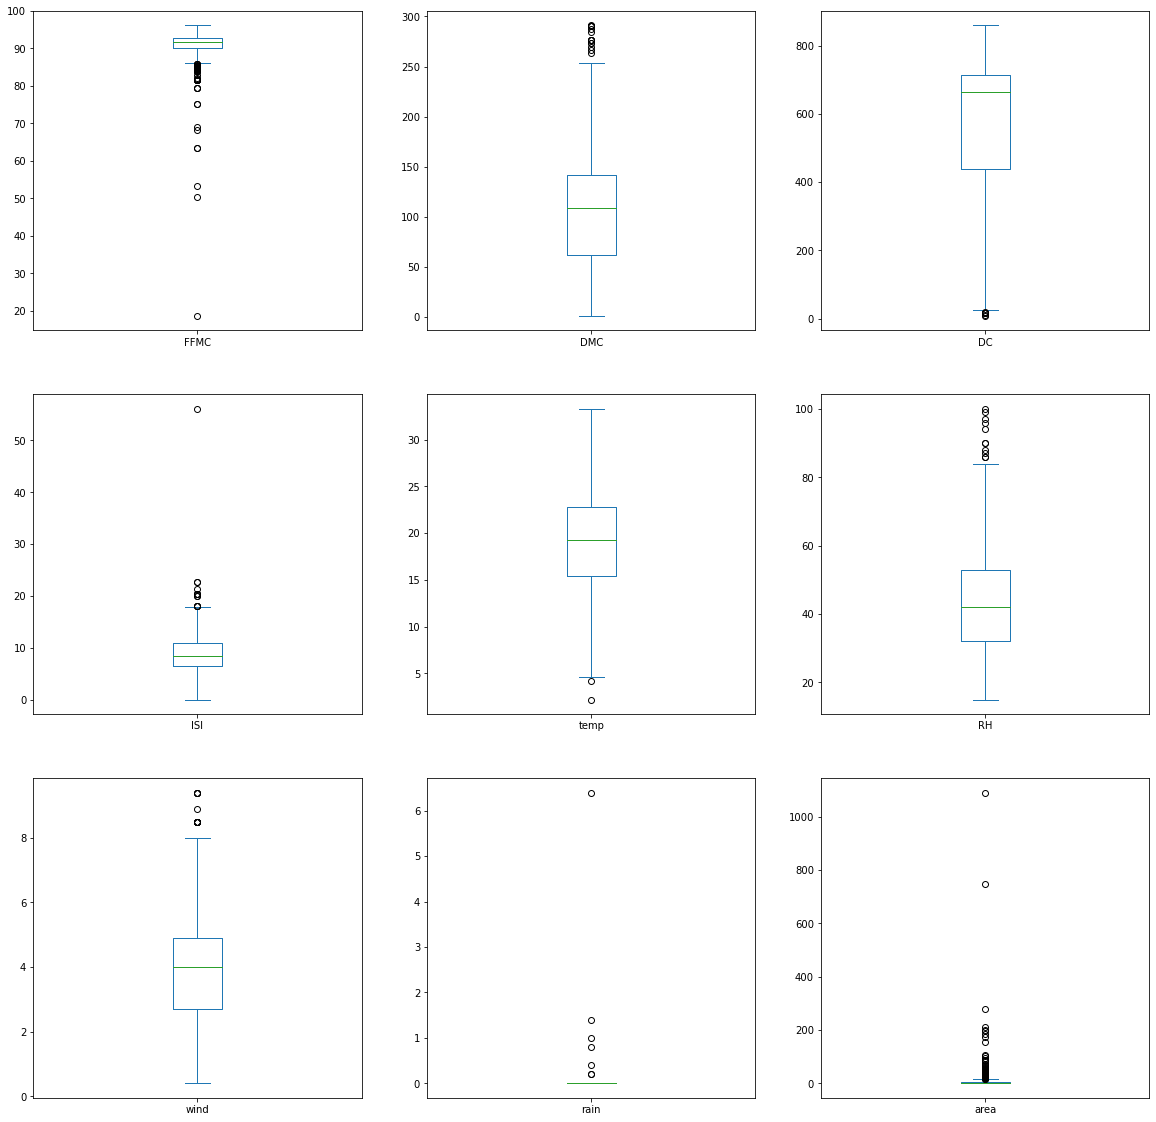

In [81]:
#Plotting the boxplot to check the outliers
df1[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [83]:
# since we dont required first 2 features i.e. month and day we can drop it for model
x=df1.iloc[:,2:30]
y=df1.iloc[:,30]

In [89]:
x.hea

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
y.head(2)

0    small
1    small
Name: size_category, dtype: object

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Buildig SVM model:Linear  model

In [94]:
from sklearn.svm import SVC
from sklearn import metrics
model_linear=SVC(kernel='linear')
model_linear.fit(x_train,y_train)
pred_linear=model_linear.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_linear))


Accuracy: 0.9803921568627451


# Buildig SVM model:poly

In [98]:
model_poly=SVC(kernel='poly')
model_poly.fit(x_train,y_train)
pred_poly=model_poly.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_poly))

Accuracy: 0.803921568627451


# Buildig SVM model:RBF

In [99]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
pred_rbf=model_rbf.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_rbf))

Accuracy: 0.7745098039215687


# Buildig SVM model:sigmoid

In [102]:
model_sigmoid=SVC(kernel='sigmoid')
model_sigmoid.fit(x_train,y_train)
pred_sigmoid=model_sigmoid.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_sigmoid))

Accuracy: 0.7156862745098039


# AccuracyLinear model is good 